<a href="https://colab.research.google.com/github/wenyao-h/Machine-Learning/blob/Time-Series/TimeSeries_ADfuller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_ar(lags, coefs, length):
  coefs = np.array(coefs)
  series = [np.random.normal() for _ in range(lags)] #a_t, a_t-1, ..., a_t-k
  for _ in range(length): #下面没有_，也就是同样的内容来length次，相当于t=length
    # print('iter: ',_, end=" ")
    #get previous values of the series, reversed
    prev_vals = series[-lags:][::-1]
    # print("pre_vals:", prev_vals, end=" ")

    #get new value of time series
    new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal() #new_val-->Z_t; prev_vals: Z_t-1, ..., Z_t-k + a_t
    #AR model: Zt = coef_1*Zt-1 + coef_2*Zt-2 + ... + at
    # print("new_val:", new_val)

    series.append(new_val)

  return np.array(series)


In [ ]:
def perform_adf_test(series):
  result = adfuller(series)
  print("ADF Statistic: %f" %result[0])
  print("p-value: %f" %result[1]) #p-value大于0.05，就拒绝原假设（系数为1）-->模型不能被证明是不均衡的

## AR(1) Process

#### Stationary

Text(0.5, 1.0, 'Stationary AR(1) Process')

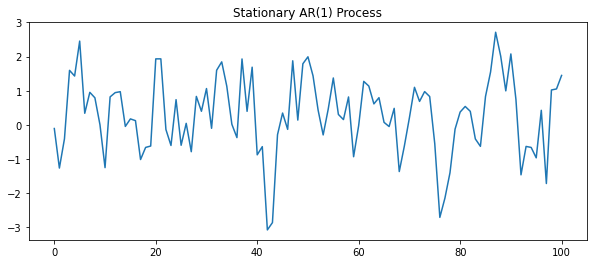

In [ ]:
ar_1_process = generate_ar(1, [0.5], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process)
plt.title("Stationary AR(1) Process")


In [ ]:
perform_adf_test(ar_1_process)

ADF Statistic: -6.014641
p-value: 0.000000


## AR(2) Process

#### Stationary

Text(0.5, 1.0, 'Stationary AR(2) Process')

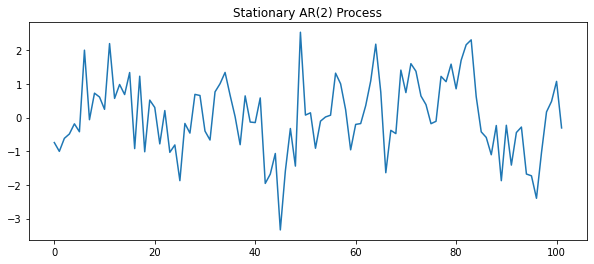

In [ ]:
ar_2_process = generate_ar(2, [0.4, 0.3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process)
plt.title("Stationary AR(2) Process")


In [ ]:
perform_adf_test(ar_2_process)

ADF Statistic: -3.321185
p-value: 0.013958


## AR(2) Process

#### Non-stationary

Text(0.5, 1.0, 'Non-stationary AR(2) Process')

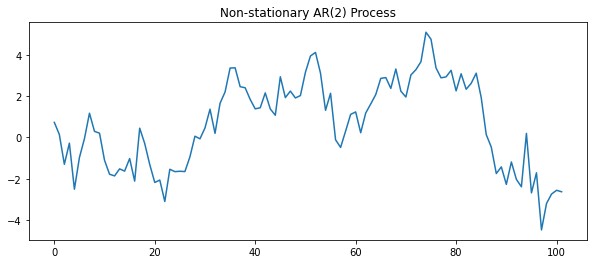

In [ ]:
ar_2_process_unitroot = generate_ar(2, [0.7, 0.3], 100)  #两个coef加起来为1，肯定non-stationary
plt.figure(figsize=(10,4))
plt.plot(ar_2_process_unitroot)
plt.title("Non-stationary AR(2) Process")


In [ ]:
perform_adf_test(ar_2_process_unitroot)

ADF Statistic: -1.565468
p-value: 0.500913


## Another Example

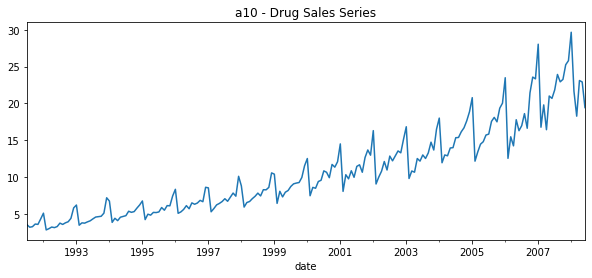

In [ ]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')
series = df.loc[:, 'value'].values
df.plot(figsize=(10,4), legend=None, title='a10 - Drug Sales Series')

In [ ]:
result = adfuller(series, autolag='AIC') 
# autolag: Method to use when automatically determining the lag length among the values 0, 1, …, maxlag
# If “AIC” (default) or “BIC”, then the number of lags is chosen to minimize the corresponding information criterion.
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'n_lags: {result[2]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: 3.1451856893067287
p-value: 1.0
n_lags: 15
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


In [ ]:
result
# returns: 
# adf(the test statistic) / p-value / usedlag / #observation / critical values(dict, test statistic at the CI level of 1% ,5%, 10%)

(3.1451856893067287,
 1.0,
 15,
 188,
 {'1%': -3.465620397124192,
  '10%': -2.5750324547306476,
  '5%': -2.8770397560752436},
 549.6705685364172)